In [2]:
### Get test data (filename, content) ###
import glob, os

# Testing path
inputPath = '/home/radlab/dev/bdec/test_data/inputs/cluster-sample'

data = []

# Loop through each filename ending with .txt in inputPath and open each one
for filename in glob.glob(os.path.join(inputPath, '*.txt')):
    
    # Open the document
    with open(filename, 'r') as f:
        sample = f.read()
        data.append(sample)

In [ ]:
### Create TF-IDF vectors ###
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data)

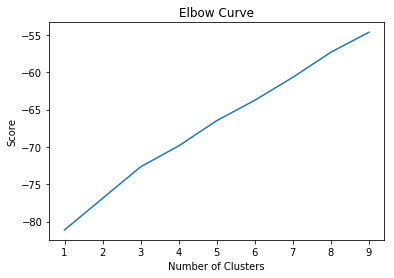

In [8]:
### Identify no. of clusters using elbow curve ###
import pylab as pl

# Load doc2vec model if not already loaded
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i, init='k-means++', max_iter=100) for i in Nc]
# kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
# score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

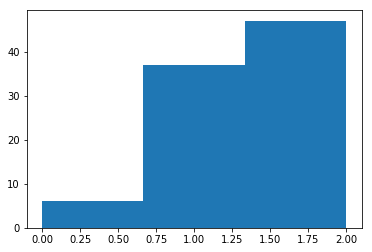

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

k = 3
kmeans_model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
kmeans_model.fit(X)

plt.hist(kmeans_model.labels_, bins=k)
plt.show()

[t-SNE] Computing 89 nearest neighbors...
[t-SNE] Indexed 90 samples in 0.000s...
[t-SNE] Computed neighbors for 90 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 90 / 90
[t-SNE] Mean sigma: 0.202793
[t-SNE] Computed conditional probabilities in 0.008s
[t-SNE] Iteration 50: error = 51.8291855, gradient norm = 0.4905867 (50 iterations in 0.088s)
[t-SNE] Iteration 100: error = 51.3390160, gradient norm = 0.5373870 (50 iterations in 0.049s)
[t-SNE] Iteration 150: error = 48.8206100, gradient norm = 0.5903763 (50 iterations in 0.048s)
[t-SNE] Iteration 200: error = 50.9119453, gradient norm = 0.5490772 (50 iterations in 0.058s)
[t-SNE] Iteration 250: error = 50.2157936, gradient norm = 0.4564534 (50 iterations in 0.052s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.215794
[t-SNE] Iteration 300: error = 0.4011392, gradient norm = 0.0145419 (50 iterations in 0.048s)
[t-SNE] Iteration 350: error = 0.2192440, gradient norm = 0.0066879 (50 i

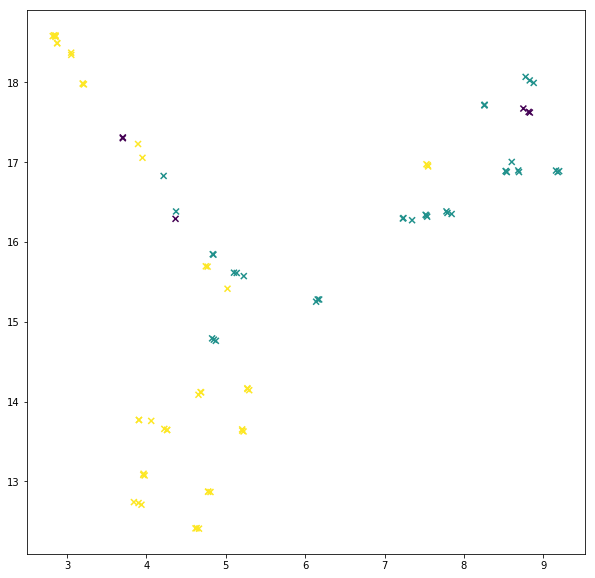

In [14]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

tfs_reduced = TruncatedSVD(n_components=k, random_state=0).fit_transform(X)

tfs_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(tfs_reduced)

fig = plt.figure(figsize = (10, 10))
ax = plt.axes()
plt.scatter(tfs_embedded[:, 0], tfs_embedded[:, 1], marker = "x", c = kmeans_model.labels_)
plt.show()

In [18]:
print("Top terms per cluster:\n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print('\n')
 
print("Prediction")
    
Y = vectorizer.transform(["Human Immunodeficiency Virus 1 uses for entry into host cells a receptor and one of two co-receptors." ])
prediction = model.predict(Y)
print(prediction)  
    
Y = vectorizer.transform(["AIMX	In this paper, we approach the problem in its most general form by algebraic methods and give a complete algebraic characterization of tractable constraint languages"])
prediction = model.predict(Y)
print(prediction)
 
Y = vectorizer.transform(["OWNX On the other hand, if one were to look for mechanically strong proteins then the architectures and folds identified by us should provide a good starting point."])
prediction = model.predict(Y)
print(prediction)

Top terms per cluster:

Cluster 0:
 splicing
 therapy
 receptor
 misc
 citation
 v3
 induction
 loop
 binding
 maintenance


Cluster 1:
 symbol
 misc
 loss
 qa
 ownx
 clustering
 bounds
 randomized
 convergence
 mdl


Cluster 2:
 misc
 citation
 ownx
 number
 spatial
 polyq
 network
 formula
 face
 model


Prediction
[0]
[2]
[2]
